In [1]:
#-*- coding: utf-8 -*-
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sympy import *
from sympy.physics.quantum import Dagger, Operator, HermitianOperator
from sympy.physics.matrices import msigma
from sympy import Function
#numpy
import numpy as np
#display muestra lo que necesite en el formato adecuado
from IPython.display import display
import pandas as pd
# lo usamos en la defifnición de la funcion terms_rep
from collections import defaultdict
import colorama
init_printing()

#Mis funciones
def separar_campos(expr):
    '''Esta función toma un lagrangiano L y sustrae de cada termino la parte 
    que esta involucrada con los campos'''
    lista = [expr.args[i].args_cnc() for i in range(len(expr.args))]
    lista_campos = [np.prod(np.array(lista[i][1])) for i in range(0,len(lista))]
    lista = lista_campos
    for i in range(0,len(lista)):
        if lista[i]==1.0:
            lista[i]=S(1)
    return lista

def lista_campos_acoplamientos(L):
    '''Esta función toma un lagrangiano L y devuelve una lista de sublistas cada 
    una con un termino separado en campos y acoplamientos'''
    lista = [L.args[i].args_cnc() for i in range(len(L.args))]
    lista_acoplamientos = [[np.prod(np.array(lista[i][0])),np.prod(np.array(lista[i][1]))] 
                           for i in range(0,len(lista))]
    lista = lista_acoplamientos
    for i in range(0,len(lista)):
        if lista[i][1]==1.0:
            lista[i][1]=S(1)
    return lista

def dic_inv(dicc):
    '''
    Esta función toma un diccionario e invierte sus 
    claves y valores
    '''
    claves = list(dict.keys(dicc))
    return {dicc[i]:i for i in claves}


def terms_rep(lista):
    '''
    Esta función da como resultado un diccionario con claves igual a los elementos de 
    una lista y como valores una lista con los índices donde ella se repite. 
    Nosotros lo usamos para terminos en un expresion simbolica.
    '''
    FDE = lista

    aux = defaultdict(list)
    for index, item in enumerate(FDE):
        aux[item].append(index)
    result = {item: indexs for item, indexs in aux.items()}
    return result

def factorizar_campos(expr):
    '''
    Esta función factoriza todos los campos o productos de campos.
    '''
    expr = expr.expand()
    campos = terms_rep(separar_campos(expr))
    claves = list(dict.keys(campos))
    terminos = lista_campos_acoplamientos(expr)
    return sum([sum([terminos[i][0] for i in campos[j]]).simplify()*j for j in claves])

**Ayuda para construir este notebook.**

Interesante guía del uso de [markdown](http://joedicastro.com/pages/markdown.html#mark11).

En este notebook se tomó como referencia base el libro [Quantum Field Theory For The Gifted Amateur](http://www.dsf.unica.it/~fiore/libricorsoptr/QuantumFieldTheoryForTheGiftedAmateur.pdf) de Tom Lancaster.

<img src="https://culturacientifica.com/app/uploads/2014/06/Del-modelo-estandar-2.png" />

# Modelo Estándar

## Introducción

En este notebook realizaremos la contrucción del modelo estándar de particulas elementales enfocando nos únicamente en ek sector eletrodébil. El modelo estandar está basado en el grupo de norma $SU(3)_{C}\otimes SU(2)_{L}\otimes U(1)_{Y}$. De acuerdo la forma en que se transforman bajo este grupo está ralacionada a las relación de Gell-Man-Nishijima:
$$Q = I_{3} + \frac{Y}{2}$$


donde $Q$ represernta la carga electromagnética, $Y$ la hipercarga y finalmente $I_{3}$ representa la tercer componente del isoespín, lo cual se resume en la siguiente tabla:
<center>
<table>\label{tabla:QIY}
  <tr>
    <th>particula</th>
    <th>$Q$</th>
    <th> $I_{3}$ </th>
    <th> $Y$ </th>
  </tr>
  <tr>
    <td>$u_{L}$</td>
    <td>2/3</td>
    <td>1/2</td>
    <td>1/3</td>
  </tr>
  <tr>
    <td>$d_{L}$</td>
    <td>-1/3</td>
    <td>-1/2</td>
    <td>1/3</td>
  </tr>
  <tr>
    <td>$\nu_L$</td>
    <td>0</td>
    <td>1/2</td>
    <td>-1</td>
  </tr>
  <tr>
    <td>$e_L$</td>
    <td>-1</td>
    <td>-1/2</td>
    <td>-1</td>
  </tr>
</table>
</center>

En el caso de las particulas quirales derechas al no transformarse bajo $SU(2)$ solo tienen carga electrica Q idéntica a la de sus análogos de quiralidad izquierda. Los valores de $I_3$ en la tabla anterior tienen su origen en la estructura de dobletes bajo la cual se transforman las particulas de quiralidad izquierda, es decir,

$$\begin{pmatrix}
u_L\\
d_L
\end{pmatrix}, \quad
\begin{pmatrix}
\nu_L\\
e_L
\end{pmatrix} 
\quad 
\begin{array}{c}
\rightarrow\\
\rightarrow
\end{array}
\quad
\begin{array}{l}
isoespín = 1/2\\
isoespín = -1/2
\end{array}
$$

Así, la hypercarga en términos de $Q$ y $I_3$ es

In [2]:
Q = symbols('Q')
I_3 = symbols(r'I_3')
Y = 2*(Q - I_3)
collect_const(Y)
Y.subs({Q:0,I_3:S(1)/2})

A continuación el diccionario "carga", que contiene como "keys" los diferentes sectores de fermiones y como "values" el valor de la carga eléctrica correspondiente.

In [3]:
carga = {'u_L':S(2)/3,'d_L':-S(1)/3,'nu_L':S(0),'e_L':-S(1)}
carga

{'d_L': -1/3, 'e_L': -1, 'nu_L': 0, 'u_L': 2/3}

La lista "fermiones_L" continene a los fermiones de quiralidad izquierda.

In [4]:
fermiones_L = list(dict.keys(carga))
fermiones_L

['d_L', 'u_L', 'nu_L', 'e_L']

La lista "fermiones_r" continene a los fermiones de quiralidad derecha.

In [5]:
fermiones_R = ['u_R','d_R','nu_R','e_R']
fermiones_R

['u_R', 'd_R', 'nu_R', 'e_R']

In [6]:
isospin_3 = dict.fromkeys(fermiones_L) # crea un nuevo diccionario con los "keys" de la lista fermiones_L

for i in range(0,4):
    if fermiones_L[i]=='u_L' or fermiones_L[i]=='nu_L':
        isospin_3[fermiones_L[i]] = S(1)/2
    else:
        isospin_3[fermiones_L[i]] = -S(1)/2
isospin_3

{'d_L': -1/2, 'e_L': -1/2, 'nu_L': 1/2, 'u_L': 1/2}

Entonces podemos obtener el diccionario "hypercarga" utulizando la definición de la hypercarga $Y$ en términos de $Q$ y $I_3$.

In [7]:
hypercarga = dict.fromkeys(fermiones_L)

for i in fermiones_L:
    hypercarga[i] = Y.subs({Q:carga[i],I_3:isospin_3[i]})
    
hypercarga

{'d_L': 1/3, 'e_L': -1, 'nu_L': -1, 'u_L': 1/3}

## Sector escalar (Higgs)

El sector escalar esta formado unicamente por el lagrangiano conrrespondiente al doblete de Higgs $\phi$. Este Lagrangiano tiene la forma:

$$\mathcal{L}_{\phi} = (D_{\mu}\phi)^{\dagger}D^{\mu}\phi - V_{h}$$

donde $V_{h} = \frac{m_{h}^{2}}{2}\phi^{\dagger}\phi-\frac{\lambda}{4}(\phi^{\dagger}\phi)^{2}$ es el potencial de Higgs. Por lo que es sector escalar se divide en dos partes:

 - **Cinético:** Este contiene las interacciones entre bósones de Norma y el higgs.
 - **Potencial** Contiene las interaciones Higgs-Higgs.
 
A continuación iniciamos con el potencial de Higgs

### Potencial de Higgs

En el modelo estandar, el potencial de Higgs, está dado por 

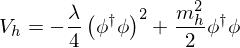

In [2]:
ϕ = MatrixSymbol(r'\phi',2,1) 
m_h = Symbol(r'm_h')
λ = Symbol(r'\lambda')
V_h = Symbol(r'V_h')

V = (m_h**2/2)*Dagger(ϕ)*ϕ - (λ/4)*(Dagger(ϕ)*ϕ)**2
Eq(V_h, V)

Sustituimos el campo $\phi$ en términos de campor reales, $\phi_i$ con $i = 1,2,3,4$

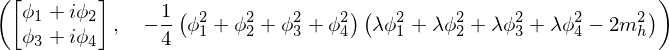

In [4]:
ϕ_1 = Symbol(r'\phi_1', real=True)
ϕ_2 = Symbol(r'\phi_2', real=True)
ϕ_3 = Symbol(r'\phi_3', real=True)
ϕ_4 = Symbol(r'\phi_4', real=True)
ϕp = Matrix([ϕ_1 + I*ϕ_2,ϕ_3 + I*ϕ_4])
V = (V.subs({ϕ:ϕp}).doit()).factor()
ϕp ,V

Si nos fijamos en el valor de expectación en el vació vev dado por

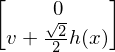

In [30]:
v = Symbol(r'v', real=True)
x = Symbol(r'x', real=True)
h = Function('h')(x)
cond_min = {ϕ_1:0,ϕ_2:0,ϕ_3:v+h/sqrt(2),ϕ_4:0}
ϕvev = ϕp.subs(cond_min)
ϕvev

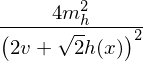

In [31]:
λ_0 = solve(V.diff(ϕ_3).subs(cond_min),λ)[0]
λ_0

en este caso el potencial de Higgs se reduce a:

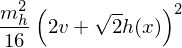

In [32]:
Vvev = V.subs(cond_min).subs({λ:λ_0})
Vvev.simplify()

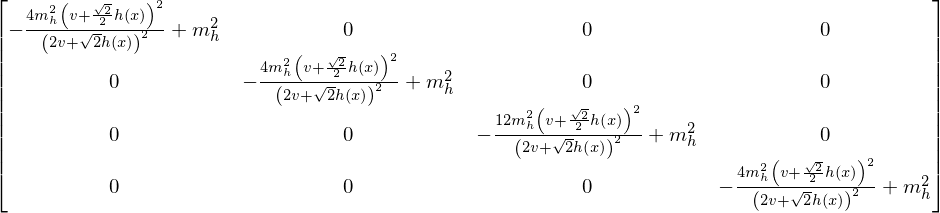

In [33]:
ϕs = [ϕ_1,ϕ_2,ϕ_3,ϕ_4]
M = Matrix([[V.diff(i).diff(j).simplify() for i in ϕs] for j in ϕs])

M = M.subs(cond_min).subs({λ:λ_0})
M

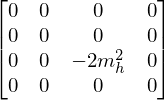

In [34]:
for i in [0,1,2,3]:
    M[i,i] = M[i,i].simplify()

M

### Termino cinético del Higgs

Ahora definimos la derivada covariante para el campo de higgs $$D_\mu \phi  = \partial_{\mu}\phi - \frac{i g_1}{2}\mathbf{\tau}\cdotp \mathbf{W}_{\mu}\phi - \frac{i g_2}{2} B_{\mu}\phi$$

Entonces el término cinético del Higgs está dado por:

$$L_{k} = (D_{\mu}\phi)^{\dagger} D^{\mu}\phi.$$

En lo siguiente escribiremos $L_{k}$ cuando tomamos el valor de expectación en el vació del el cual nombramos anteriormente como $\phi vev$ y en términos de los bósones de norma $w^{\pm}$ y $Z$

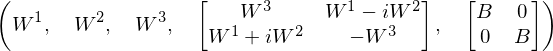

In [35]:
W1 = HermitianOperator(r'W_{μ}^{1}')
W2 = HermitianOperator(r'W_{μ}^{2}')
W3 = HermitianOperator(r'W_{μ}^{3}')
B_μ = HermitianOperator(r'B_{μ}')
b_μ = Matrix([[B_μ,0],[0,B_μ]])#Matriz unitaria 2x2 multiplicada por B_μ
τW = msigma(1)*W1 + msigma(2)*W2 + msigma(3)*W3 #producto punto τ.W
W1, W2, W3, τW, b_μ


Nos fijamos primero en el término 
$\partial_{\mu}\phi = 
\begin{pmatrix}
0\\
\frac{1}{\sqrt{2}}\partial_{\mu}h(x)
\end{pmatrix}$

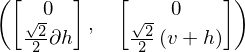

In [36]:
h = HermitianOperator('h')
δ_μh= HermitianOperator(r'\partial_{μ} h')
Δ_μϕ = Matrix([0,(1/sqrt(2))*δ_μh])
ϕvev = Matrix([0,(1/sqrt(2))*(v+h)])
Δ_μϕ, ϕvev

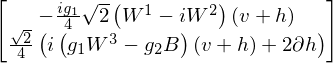

In [37]:
g_1 = Symbol(r'g_1', real=True)
g_2 = Symbol(r'g_2', real=True)
D_μϕ = (Δ_μϕ - ((I*g_1/2)*τW + (I*g_2/2)*b_μ)*ϕvev)
D_μϕ[0,0] = D_μϕ[0,0].simplify()
D_μϕ[1,0] = D_μϕ[1,0].simplify()
D_μϕ

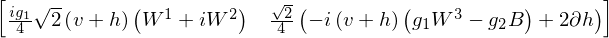

In [38]:
D_μϕ_dagger = (Matrix([Dagger(D_μϕ[0,0]), Dagger(D_μϕ[1,0])]).T).subs({conjugate(δ_μh):δ_μh,conjugate(h):h})
D_μϕ_dagger

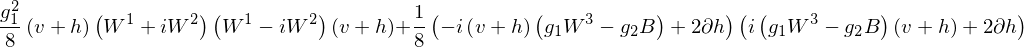

In [120]:
L_k = (D_μϕ_dagger*D_μϕ)[0]
L_k

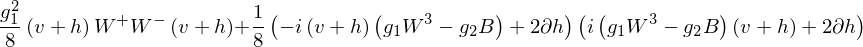

In [121]:
Wmenos = Operator(r'W^{-}')
Wmas = Operator(r'W^{+}')
Z_μ = Operator(r'Z_{μ}')
A_μ = Operator(r'A_{μ}')
#substituciones de W1 y W2 por Wmas y Wmenos
Wsubs = {W1-I*W2:Wmenos,W1+I*W2:Wmas}
L_k = L_k.subs(Wsubs)
L_k

Finalmente el término cinético muestra los posibles acoplamientos del Higgs $h$ con los bósones $W^{\pm}$ y $Z$

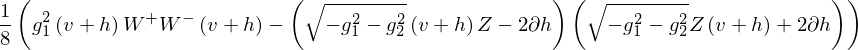

In [122]:
Z_μ = HermitianOperator(r'Z_μ')
A_μ = HermitianOperator(r'A_μ')
#,g_1*W3+g_2*B_μ:sqrt(g_1**2 + g_2**2)*A_μ
ZAsubs = {g_1*W3-g_2*B_μ:sqrt(g_1**2 + g_2**2)*Z_μ}
L_k = L_k.subs(ZAsubs).collect([Z_μ**2*h,Z_μ**2])
L_k.simplify()

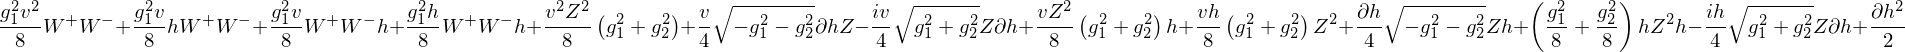

In [125]:
L_k = factorizar_campos(L_k)
L_k

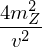

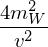

In [116]:
r = L_k.collect([v**2*Z_μ**2,v**2*Wmas*Wmenos,Z_μ**2*h**2],evaluate=False)
m_Z = symbols(r'm_Z',real=True)
m_W = symbols(r'm_W',real=True)
a = solve(Eq((r[v**2*Z_μ**2]).factor(),(S(1)/2)*m_Z**2/v**2),g_1**2 + g_2**2)[0]
b = solve(Eq(r[v**2*Wmas*Wmenos],(S(1)/2)*m_W**2/v**2),g_1**2)[0]
a
b

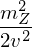

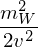

KeyError: Z_μ**2*h**2

In [92]:
r[v**2*Z_μ**2] = (r[v**2*Z_μ**2]).factor().subs({g_1**2 + g_2**2:a})
r[v**2*Z_μ**2]
r[v**2*Wmas*Wmenos] = r[v**2*Wmas*Wmenos].subs({g_1**2:b})
r[v**2*Wmas*Wmenos]
r[Z_μ**2*h**2]

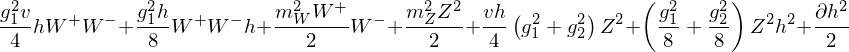

In [84]:
lista = list(dict.keys(r))
L_k = Add(*[r[i]*i for i in lista])
L_k

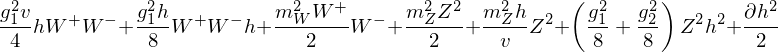

In [85]:
L_k.subs({g_1**2 + g_2**2:a})

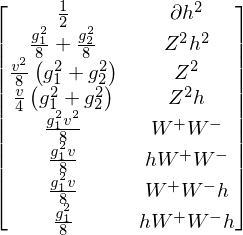

In [48]:
Matrix(lista_campos_acoplamientos(L_k))

Finalmente podemos reescribir la derivada covariante en términos de los campos físicos $W^{\pm}$, $A_{\mu}$ y  $Z_{\mu}$

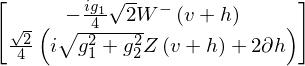

In [54]:
D_μϕ = D_μϕ.subs(Wsubs).subs(ZAsubs)
D_μϕ

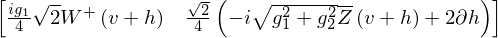

In [70]:
#(Matrix([Dagger(D_μϕ[0]), Dagger(D_μϕ[1])]).T)#.subs({conjugate(δ_μh):δ_μh,conjugate(h):h})
Dagger(Matrix([D_μϕ[0],D_μϕ[1]])).subs({conjugate(δ_μh):δ_μh,conjugate(h):h,\
                                        conjugate(Wmenos):Wmas})


## Sector fermiónico

Para construir el Lagrangiano correspondiente a fermiones, 
tenemos que considerar lagrangiano de Dirac el cual tiene la forma:

\begin{equation}\label{eq:Dirac-lagrangiano}
\mathcal{L}_{D} = \overline{\psi}(i\gamma^{\mu} \partial_{\mu} -m)\psi
\end{equation}

donde $\overline{\psi} = \psi^{\dagger}\gamma^{0}$. Sin embargo, al considerar los campos fermionicos en términos de los campos de quiralidad izquierda y derecha $\psi = \psi_L + \psi_R$, entonces \ref{eq:Dirac-lagrangiano} toma la forma:

\begin{equation}\label{eq:DiracLR}
\mathcal{L}_{D} = \overline{\Psi_R}i\gamma^{\mu} \partial_{\mu}\Psi_R + \overline{\Psi_L}i\gamma^{\mu} \partial_{\mu}\Psi_L -m(\overline{\Psi_R}\Psi_{L} + \overline{\Psi_L}\Psi_{R})
\end{equation}

Sin embargo la introducción de la simetría gauge, impone la introducción de la derivada covariante:

$$\partial_{\mu} \rightarrow  D_{\mu}.$$

Este cambio depende de la quiralidad que se consideré entonces tenemos que 

\begin{equation}\label{eq:DmuR}
D_{\mu}\Psi_R = \partial_{\mu}\Psi_R - \frac{i}{2} g_2 Y B_{\mu} \psi_R
\end{equation}

\begin{equation}\label{eq:DmuL}
D_{\mu}\Psi_L = \partial_{\mu}\Psi_L - \frac{i}{2} g_2 Y B_{\mu}\Psi_L - i g_1 I \tau \cdot W_{\mu}\Psi_L
\end{equation}


Así en el Modelo Estándar, consideraremos para cada fermión un lagrangiano analógo a la ec. \ref{eq:DiracLR}. Comenzaremos construyendo el termino cinético.


### Término cinético para leptones

#### Prueba 1
$x^{2}$

Para simplificar esta parte, consideraremos la primer familia leptónica $\nu_e$ y $e$ ya que las otras dos familias  son basicamente idénticas. 

Cuando consideramos la primer familia, tenemos que recordar que en el Modelo estandar no tenemos neutrinos derechos. Entonces el término cinético que consideraremos es:

\begin{equation}\label{eq:term-cinetico-enu}
i \overline{e_R}\gamma^{\mu} D_{\mu}e_R + i\overline{\Psi_L}\gamma^{\mu} D_{\mu}\Psi_L
\end{equation}


donde $\Psi_L = (\nu_{e_L},e_L)^{\top}$. En este caso, usando las ecs. (\ref{eq:DmuR}), (\ref{eq:DmuL}) y usando la hypercarga e isoespin correspondientes en la tabla 1, tenemos 

$$D_{\mu}e_R = \partial_{\mu}e_{R} + i g_2 B_{\mu} e_{R}$$
$$D_{\mu}\Psi_L = \partial_{\mu}\Psi_L + \frac{i}{2} g_2 B_{\mu}\Psi_L - \frac{i}{2} g_1 \tau \cdot W_{\mu}\Psi_L  $$

Iniciamos definiendo a los campos en sympy de la siguiente manera:
$\Psi_L \rightarrow \Psi$_L 
$\overline{\Psi_L} \rightarrow \Psi$_Lb
$e_R \rightarrow e$_R 
$\overline{e_R} \rightarrow \Psi$_Rb


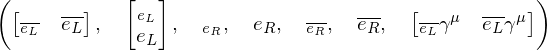

In [26]:
#Campos izquierdos
ν_eL = Operator(r'ν_{e_{L}}')
eL = Operator(r'e_{L}')
#Adjuntos de campos izquierdos
ν_eLb = Operator(r'\overline{ν_{e_{L}}}')
eLb = Operator(r'\overline{e_{L}}')
#Campos derechos
ν_eR = Operator(r'ν_{e_{R}}')
eR = Operator(r'e_{R}')
#Adjuntos de campos derechos
ν_eRb = Operator(r'\overline{ν_{e_{R}}}')
eRb = Operator(r'\overline{e_{R}}')
#Definimos Ψ_L y su adjunto conjugado
Ψ_L = Matrix([ν_eL,eL])
Ψ_Lb = Matrix([ν_eLb,eLb]).T
# simbolo matriz γmu
γmu = Operator(r'\gamma^{\mu}')
Ψ_Lb,Ψ_L,ν_eR,eR,ν_eRb ,eRb,Ψ_Lb*γmu

Para futuras simplificaciones creamos a continuación los diccionarios siguientes:
 - campoL: contiene los campos de quiralidad izquierda.
 - campoR: contiene los campos de quiralidad derecha.
 - campo_adjuntoL: contiene los campos adjuntos de quiralidad izquierda
 - campo_adjuntoR: contiene los campos adjuntos de quiralidad derecha

***
**Nota: Agregando un elemento a un diccionario**
Para agregar otro campo \rho_L, por ejemplo, a alguno de los diccionarios anteriores, tenemos que realizar los siguientes pasos:
 - Definir el simbólo como un operador \rho_L, por ejemplo, de la siguiente manera `\rho_L = Operator(r'\rho_L')`.
 - Si el nombre de la particula es por ejemplo "nueva particula", entonces en este caso lo agregariamos al diccionario `campoL` haciendo lo siguiente: `campoL['nueva particula'] = \rho_L`.
 - Si la "nueva particula" asociada al campo \rho tiene quiralidad izquierda se debe agregar usando los pasos anteriores, de la siguiente manera:
  * `\rho_R = Operator(r'\rho_R')` 
  * `campoR['nueva particula'] = \rho_R`
***


In [27]:
campoL = {'electrón':eL,'neutrino':ν_eL}
campoR = {'electrón':eR,'neutrino':ν_eR} 
campo_adjuntoL = {'electrón':eLb,'neutrino':ν_eLb}
campo_adjuntoR = {'electrón':eRb,'neutrino':ν_eRb} 
#Ejemplos
display(campoL,campoR,campo_adjuntoL,campo_adjuntoR)

{'electrón': e_{L}, 'neutrino': ν_{e_{L}}}

{'electrón': e_{R}, 'neutrino': ν_{e_{R}}}

{'electrón': \overline{e_{L}}, 'neutrino': \overline{ν_{e_{L}}}}

{'electrón': \overline{e_{R}}, 'neutrino': \overline{ν_{e_{R}}}}

Ahora definimos la derivada covariante aplicada a $e_R$

In [28]:
# Derivada del campo derecho
δ_μeR = Operator(r'\partial_{μ} e_{R}')
# Derivada covariante aplicada al campo e_R
D_μeR = δ_μeR + I*g_2*B_μ*eR
D_μeR

Para construir la derivada covariante aplicada a $\Psi_L$, realizemos las siguientes definiciones:

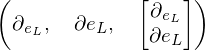

In [29]:
# Simbolos de las derivadas de los campos izquierdos.
δ_μeL = Operator(r'\partial_{μ} e_L')
δ_μν_eL = Operator(r'\partial_{μ} ν_{e_L}')
# Simbolo de la deriva del campo Ψ_L
Δ_Ψ_L = Matrix([δ_μν_eL,δ_μeL])
δ_μν_eL,δ_μeL,Δ_Ψ_L

además, recordemos nuestras definiciones anteriores:

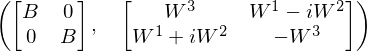

In [30]:
b_μ,τW

Entonces, la derivada covariante aplicada a $\Psi_L$

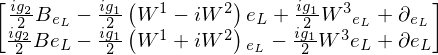

In [31]:
D_μΨ_L = Δ_Ψ_L+ (I/2)*g_2*b_μ*Ψ_L-(I/2)*g_1*τW*Ψ_L
Ψ_Lb
D_μΨ_L

Entonces, termino cinético para la primer familia de leptónes en la ec. (\ref{eq:term-cinetico-enu}), toma la forma:

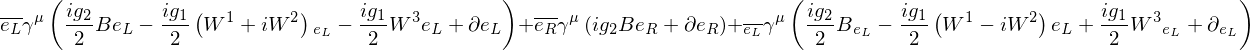

In [32]:
L_k_enu =(Ψ_Lb*γmu*D_μΨ_L)[0] + eRb*γmu*D_μeR
L_k_enu

Sin embargo redordemos que tenemos las siquientes definiciones entre $W_1$, $W_2$ y $W^{-}$, $W^{+}$

In [33]:
Wsubs

podemos reescribir este lagrangiano en terminos de $W^{-}$, $W^{+}$, $Z_{\mu}$ y $A_{\mu}$, realizamos las siguientes manipulaciones algebraicas:

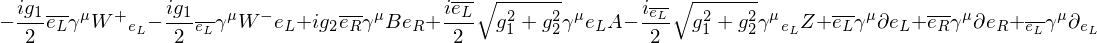

In [177]:
L_k_enu = L_k_enu.subs(Wsubs)
L_k_enu

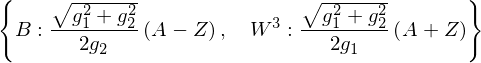

In [35]:
from sympy.abc import y,z, p, q
ZAsubs
# x->w3, y-> Bmu p-> Zmu y Amu->q
eqs = Eq(g_1*x - g_2*y,sqrt(g_1**2 + g_2**2)*p), Eq(g_1*x + g_2*y,sqrt(g_1**2 + g_2**2)*q)
pqsubs = {p:Z_μ,q:A_μ}
sols = solve(eqs,[x,y])
W3Bsubs = {W3:sols[x].subs(pqsubs),B_μ:sols[y].subs(pqsubs)}
W3Bsubs

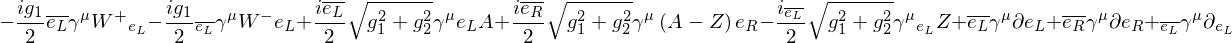

In [178]:
L_k_enu = L_k_enu.expand()
L_k_enu.subs(W3Bsubs)

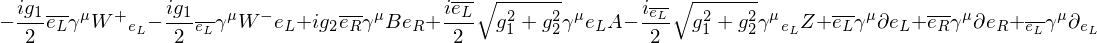

In [179]:
w =Wild('w') #variable "muda"
L_k_enu = collect(L_k_enu,I*eLb*γmu*w*eL)
L_k_enu

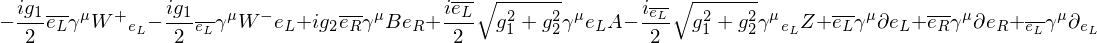

In [180]:
p =Wild('p')
r = collect(L_k_enu,ν_eLb*γmu*ν_eL, evaluate=False)
r[ν_eLb*γmu*ν_eL] = (I/2)*((-2*I)*r[ν_eLb*γmu*ν_eL]).expand()
L_k_enu = r[1] + ν_eLb*γmu*ν_eL*r[ν_eLb*γmu*ν_eL]
L_k_enu

Finamente el termino cinético en la ec. (\ref{eq:term-cinetico-enu})
$$\overline{e_R}i\gamma^{\mu} D_{\mu}e_R + \overline{\Psi_L}i\gamma^{\mu} D_{\mu}\Psi_L$$
toma la forma:

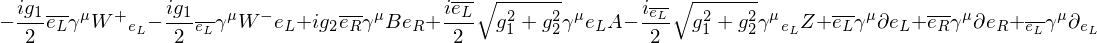

In [181]:
L_k_enu = L_k_enu.subs(ZAsubs)
L_k_enu

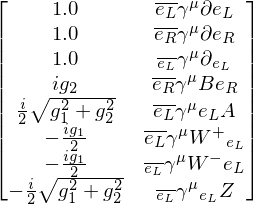

In [254]:
Matrix(lista_campos_acoplamientos(L_k_enu))

### Término de masa leptónico

Si partimos de la ec. \ref{eq:DiracLR} y nos enfocamos en el término de masa,

$$-m(\overline{\Psi_R}\Psi_{L} + \overline{\Psi_L}\Psi_{R}),$$

es claro que este termino viola la simetría Gauge por que los campos quirales izquierdos se transforman de manera diferente a los campos quirales derechos, como se puede observar en las ecs. (\ref{eq:DmuR}) y (\ref{eq:DmuL}). Por tanto este termino queda fuera del lagrangiano del Modelo estándar. Sin embargo, tenemos un término de interacción entre el higgs y los leptones

\begin{equation}\label{eq:henu}
-G_e (\overline{\Psi_L}\phi \Psi_R + \overline{\Psi_R}\phi^{\dagger} \Psi_L)
\end{equation}

donde $G_e$ es la constante de acoplamiento. Podemos expandir este término considerando el "gauge unitario", a saber:

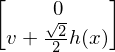

In [40]:
ϕvev

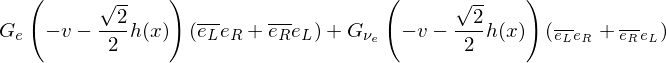

In [41]:
G_e = Symbol(r'G_e', real=True)
G_nue = Symbol(r'G_{\nu_e}', real=True)
ϕvevadj = I*msigma(2)*ϕvev
term_h_enu = -G_e*((Ψ_Lb*ϕvev*eR)[0] + eRb*(ϕvev.T*Ψ_L)[0]) -G_nue*((Ψ_Lb*ϕvevadj*ν_eR)[0] + ν_eRb*(ϕvevadj.T*Ψ_L)[0])

r = term_h_enu.expand().collect([G_e,G_nue],evaluate=False)
claves = list(dict.keys(r))
for i in claves:
    r[i] = r[i].factor()
sum(i*r[i] for i in claves)

In [42]:
def factor_de_coeff(expr,lista_coefi):
    '''
    Esta función, toma la expresión "expr" y factoriza todos los términos que acompañan a cada 
    uno de los coeficientes en la lista "lista_coefi"
    '''
    r = expr.expand().collect(lista_coefi,evaluate=False)
    claves = list(dict.keys(r))
    for i in claves:
        r[i] = r[i].factor()
    return sum(i*r[i] for i in claves)

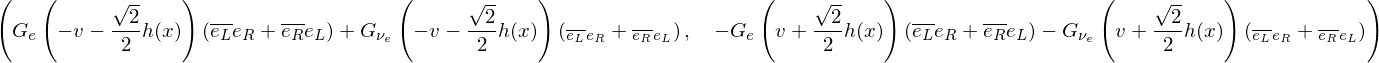

In [43]:
term_h_enu,collect(term_h_enu,[G_e,G_nue]),
factor_de_coeff(term_h_enu,[G_e,G_nue]),collect(term_h_enu,[G_e,G_nue],simplify)

## Decaimientos del bóson de Higgs.
A continuación estudiaremos de manera profunda los decaimientos posibles del higgs del Modelo Estándar. La referencia de esta sección es [The Standard Model Higgs Boson (cap. 3)](https://www.nikhef.nl/~ivov/HiggsLectureNote.pdf). 

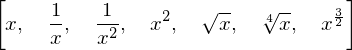

In [34]:
S("[x, 1/x, 1/x**2, x**2, x**(1/2), x**(1/4), x**(3/2)]")

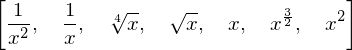

In [35]:
sorted(_, key=lambda x: x.sort_key())

In [396]:
from IPython.display import HTML, display
import tabulate
table = [["Sun",696000,1989100000],
         ["Earth",6371,5973.6],
         ["Moon",1737,73.5],
         ["Mars",3390,S(641.85)*sqrt(x)]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

Sun,696000,1989100000
Earth,6371,5973.6
Moon,1737,73.5
Mars,3390,641.85*sqrt(x)


In [407]:
#creando tablas
sym.init_printing()
x,y,z = sym.symbols('x,y,z')
da,db,dc = sym.symbols('{\Delta}a {\Delta}b {\Delta}c ' )

e_list = []
d_list = []
e_list.append(da*2*x + da*(y - 2) + db*3*z + dc*(x+y))
e_list.append(dc*z + dc*x + da*x + db*(z+2))
for e in e_list:
    display(e.expand().collect((x,y,z)))
    d_list.append(e.expand().collect((x,y,z),evaluate=False))

df = pd.DataFrame(d_list).T

In [506]:
df

,0,1
1,-2*{\Delta}a,2*{\Delta}b
x,2*{\Delta}a + {\Delta}c,{\Delta}a + {\Delta}c
z,3*{\Delta}b,{\Delta}b + {\Delta}c
y,{\Delta}a + {\Delta}c,NaN


In [515]:
collect(f,[x, xn1, xn2],evaluate=False)

In [518]:
from sympy import lambdify

def _create_func(ex,lib):
    symbs = list(ex.free_symbols)
    names = [e.name for e in symbs]
    s = sorted(zip(names,symbs))
    names, symbs = zip(*s)
    return lambdify(symbs,ex,lib), names
    
def domath(df,exp,lib='math'):    
    afunc, names = _create_func(exp,lib)
    
    tdf = df.copy()
    
    for name in names:
        if name not in tdf.columns:
            if "_" in name:
                v,i = name.split("_")
                tdf[name] = tdf[v].shift(int(i)*-1)

    vals = tdf[list(names)].values
    return [afunc(*val) for val in vals]

In [520]:
df = pd.DataFrame({'x' : [1,2,3,4] * 2, 'y' : [0.1, 0.2] * 4})

# Notice x_-1 and x_-2 are used to reference x @ t=-1, and x @ t=-2.
x, xn1, xn2, y = symbols('x x_-1 x_-2 y')

f = 3.0 * x ** 3 + 2.0 * xn1 ** 2 + xn2 + (y * 2) / 2
df['f'] = domath(df,f)
df

,x,y,f
0,1,0.1,NaN
1,2,0.2,NaN
2,3,0.1,90.1
3,4,0.2,212.2
4,1,0.1,38.1
5,2,0.2,30.2
6,3,0.1,90.1
7,4,0.2,212.2


In [522]:
f.free_symbols

In [523]:
x.name

'x'

In [531]:
ex = f
symbs = list(ex.free_symbols)
names = [e.name for e in symbs]
s = sorted(zip(names,symbs))
names, symbs = zip(*s)
lambdify(symbs,ex,'math'), names


(<function <lambda>>, ('x', 'x_-1', 'x_-2', 'y'))

In [534]:
_create_func(ex,'math')

(<function <lambda>>, ('x', 'x_-1', 'x_-2', 'y'))